<a href="https://colab.research.google.com/github/Kathi3/stunning-rotary-phone/blob/main/DescriptiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

# A) Descriptive Analysis

# READING CSV FILE & CHECKING THE DATA

In [93]:
Dataset = pd.read_csv("https://bit.ly/FinancialDataset")
Dataset

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [94]:
VarKey = pd.read_csv("https://bit.ly/VariableDefinitions")
VarKey

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [95]:
Dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [96]:
Dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [97]:
#Selecting a sample
Dataset.sample(100)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
10976,Rwanda,2016,uniqueid_4909,No,Rural,Yes,3.0,31.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
16446,Tanzania,2017,uniqueid_1644,No,Urban,No,2.0,55.0,Male,Head of Household,Single/Never Married,No formal education,Informally employed
21762,Uganda,2018,uniqueid_340,No,Urban,No,4.0,16.0,Female,Other relative,Single/Never Married,Secondary education,Other Income
1872,Kenya,2018,uniqueid_1873,No,Urban,Yes,4.0,38.0,Female,Spouse,Married/Living together,Primary education,Informally employed
10961,Rwanda,2016,uniqueid_4894,No,Rural,Yes,2.0,22.0,Female,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18862,Tanzania,2017,uniqueid_4060,No,Urban,No,4.0,65.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
14197,Rwanda,2016,uniqueid_8130,No,Rural,Yes,4.0,55.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
17292,Tanzania,2017,uniqueid_2490,No,Urban,Yes,1.0,23.0,Male,Parent,Single/Never Married,Secondary education,Self employed
2625,Kenya,2018,uniqueid_2626,No,Urban,Yes,9.0,48.0,Male,Head of Household,Married/Living together,Primary education,Informally employed


In [98]:
Dataset.shape

(23524, 13)

In [99]:
Dataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [100]:
Dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [101]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


#Data Cleaning

In [102]:
Dataset.duplicated().sum()

0

In [103]:
Dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

# This Dataset does have null values therefore, there is need to deal with this

In [104]:
Dataset.dropna(inplace=True)


In [105]:
Dataset.drop(columns='uniqueid', inplace=True)


In [106]:
Dataset.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [107]:
Unreal = Dataset[Dataset['year'].isin([2029,2056,2039])].index
Dataset.drop(index=Unreal, inplace=True)

# Section A - ANALYSIS AS A UNIVARIATE

In [108]:
#The main aim is to analyse the individuals with a bank account as the single variable under consideration.
Dataset['Has a Bank account'].value_counts(normalize = True)

No     0.858783
Yes    0.141217
Name: Has a Bank account, dtype: float64

The result shows the people who have an account in comparison to 1. ie NO appears to be larget. To get YES, It's 1-NO. 
The results show a big gap betwen the two parties.

In [109]:
#Numerical variable analysis - Household_size and Respondent Age. The rest are Categorical Variables
Dataset[['Respondent Age', 'household_size']].describe()

,Respondent Age,household_size
count,23340.000000,23340.000000
mean,38.807069,3.688560
std,16.519905,2.281275
min,16.000000,0.000000
25%,26.000000,2.000000
50%,35.000000,3.000000
75%,49.000000,5.000000
max,100.000000,21.000000


In [110]:
Dataset['household_size'].skew()

0.9741827150450616

The check for skewness shows household_size is positively skewed

In [111]:
Dataset['household_size'].kurt()

1.1538357462528523

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


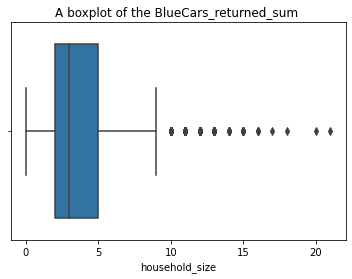

In [119]:
sns.boxplot(Dataset.household_size)
plt.title('A boxplot of the BlueCars_returned_sum ')
plt.show()

From the Kurtosis test done, the value gotten shows the 'household_size) is leptokurtic which indicates the presence of outliers, as proven by the boxplot.
This could be attributed by the level of education.

In [114]:
#Removing Outliers
def remove_outliers(Data):
  outliers = {}
  for col in df.columns:
    if str(Dataset[col].dtype) != 'object':
      Dataset = Dataset[np.abs(Dataset[col].mean())< (3*Dataset[col].std())]
      olrs = Dataset[-(np.abs(Dataset[col]-Dataset[col].mean())< (3*Dataset[col].std()))]
      outliers = pd.DataFrame(olrs)
  return Dataset, outliers


EXPLORATORY ANALYSIS


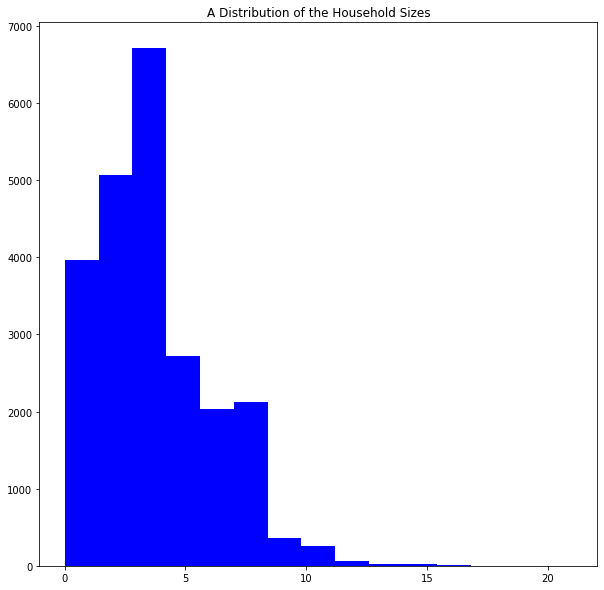

In [115]:
plt.figure(figsize=(10,10))
plt.hist(Dataset["household_size"],bins=15,color="blue")
plt.title('A Distribution of the Household Sizes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


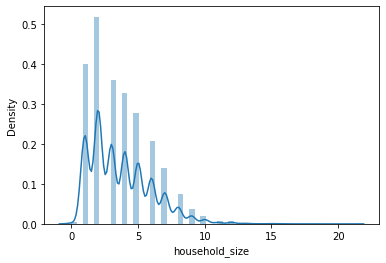

In [116]:
sns.distplot(Dataset.household_size.dropna())

In [120]:
#Analysing a 2nd variable
Dataset['Respondent Age'].skew()
#Shows Positive skewness

0.8406145812311228

In [121]:
Dataset['Respondent Age'].kurt()

0.09826807013177241

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


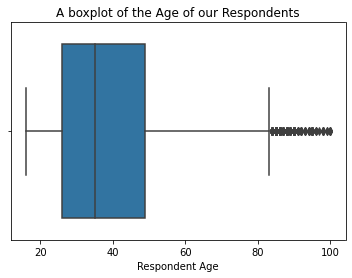

In [122]:
#Checking for outliers
sns.boxplot(Dataset['Respondent Age'])
plt.title('A boxplot of the Age of our Respondents')
plt.show()

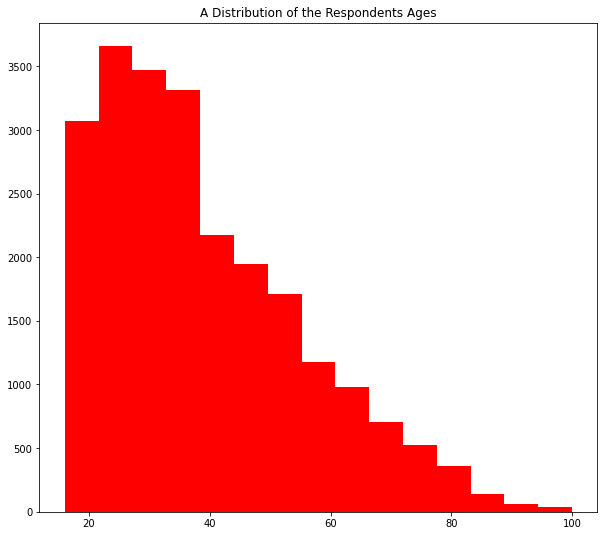

In [123]:
plt.figure(figsize=(10,9))
plt.hist(Dataset["Respondent Age"],bins=15,color="red")
plt.title('A Distribution of the Respondents Ages')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


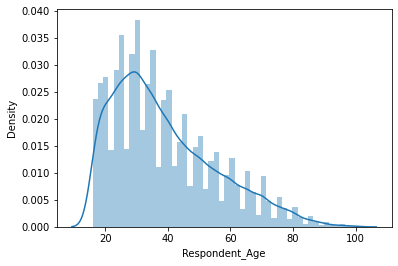

In [126]:
sns.distplot(Dataset.Respondent_Age.dropna())

In [125]:
#Renaming the column in use
Dataset.rename(columns = {'Respondent Age': 'Respondent_Age'},inplace = True)


In [127]:
#Analysis of categorical variables
Deep_dive = Dataset.select_dtypes(include='object').columns.to_list()
for col in Deep_dive:
  print(f'Column: {col}')
  print(Dataset[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: country
Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64
**********


Column: Has a Bank account
No     20044
Yes     3296
Name: Has a Bank account, dtype: int64
**********


Column: Type of Location
Rural    14263
Urban     9077
Name: Type of Location, dtype: int64
**********


Column: Cell Phone Access
Yes    17331
No      6009
Name: Cell Phone Access, dtype: int64
**********


Column: gender_of_respondent
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64
**********


Column: The relathip with head
Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: The relathip with head, dtype: int64
**********


Column: marital_status
Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      

From the above, we can see that analysis the numerical variables individually, they bring about a significant number of outliers which may question how efficient the results are.
A fusion of 2 variables is going to be used to statistically determine if there are better odds.

The categorical variables give a better summary of the information in the dataset.

# Section B - ANALYSIS AS A BIVARIATE

# EXPLORATORY ANALYSIS - BIVARIATE

In [129]:
Dataset['Respondent_Age'].corr(Dataset['household_size'])

-0.11967115234154871

This shows that the 2 variables have a very weak negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


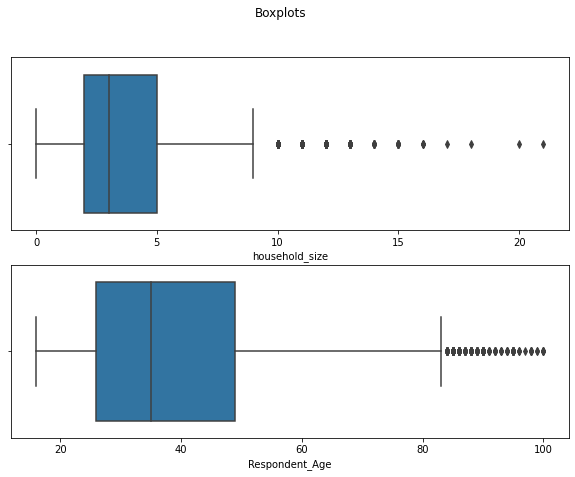

In [131]:
#Checking for outliers
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
fig.suptitle('Boxplots')
sns.boxplot(Dataset['household_size'], ax = ax1)
sns.boxplot(Dataset['Respondent_Age'], ax = ax2)
plt.show()

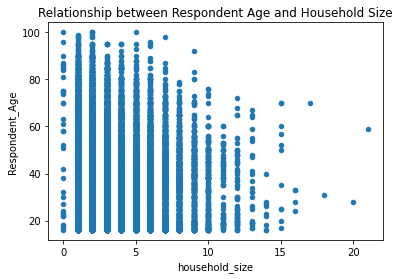

In [132]:
#Comparing 2 numerical categories
Dataset.plot.scatter(x ='household_size', y= 'Respondent_Age')
plt.title('Relationship between Respondent Age and Household Size')
plt.show()

In [133]:
#Renaming the column in use
Dataset.rename(columns = {'Has a Bank account': 'Account_Possession'},inplace = True)

In [134]:
#Renaming the column in use
Dataset.rename(columns = {'Cell Phone Access': 'Cellphone_Access'},inplace = True)


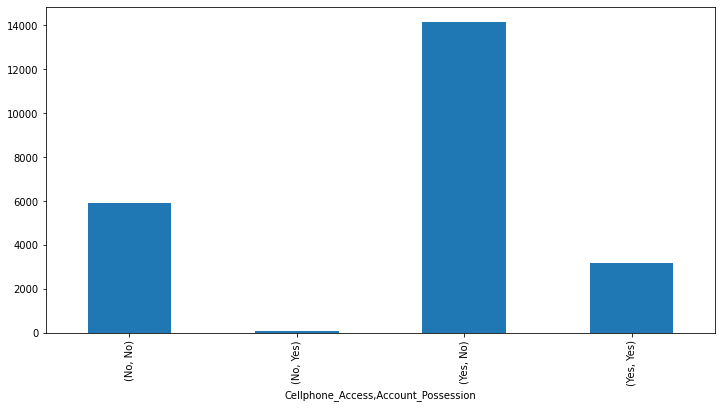

In [135]:
plt.figure(figsize=(12,6))
Dataset.groupby(["Cellphone_Access", "Account_Possession"])["Account_Possession"].count().plot(kind = 'bar')

There are very few people who have both; a bank account and a cell phone.

However the people who have a cellphone yet don't have a bank account are the majority hence this can be a great marketing strategy to introduce mobile banking.

In [136]:
#Renaming the column in use
Dataset.rename(columns = {'Type of Job': 'Type_of_Job'},inplace = True)

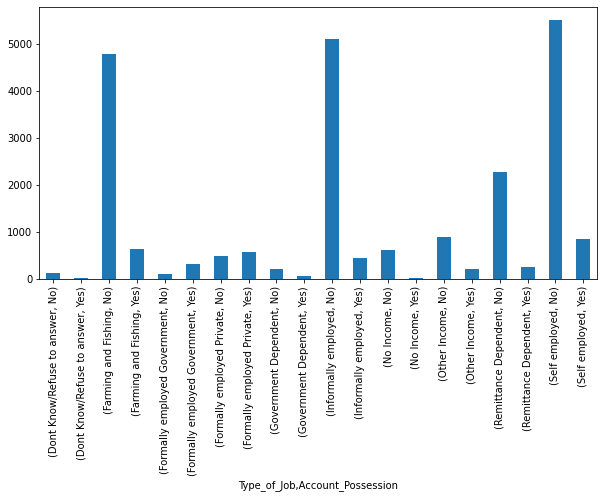

In [137]:
plt.figure(figsize=(10,5))
Dataset.groupby(["Type_of_Job", "Account_Possession"])["Account_Possession"].count().plot(kind = 'bar')

In [138]:
Dataset.rename(columns = {'Level of Educuation': 'Ed_Level'},inplace = True)

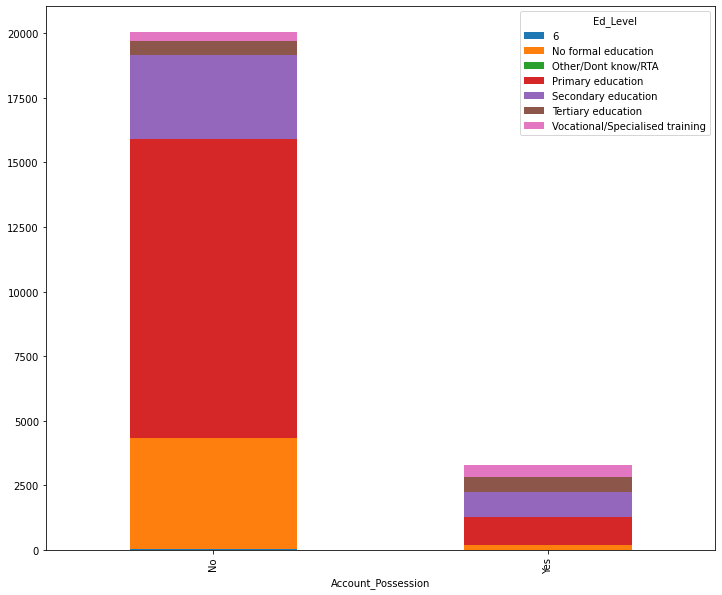

In [139]:
pd.crosstab(Dataset['Account_Possession'], Dataset['Ed_Level']).plot(kind='bar', stacked=True, figsize=(12,10))

The relationship between education and possesing an account where an increase in the level of education results in a slight increase of bank account ownership.

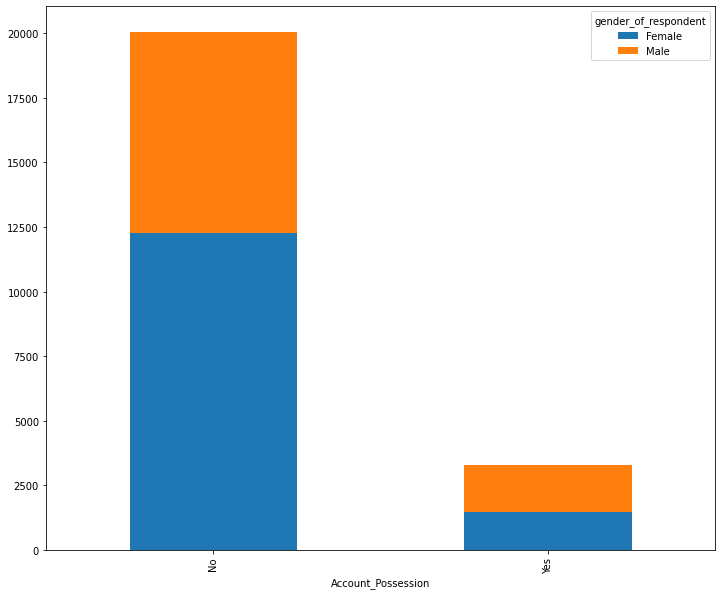

In [140]:
pd.crosstab(Dataset['Account_Possession'], Dataset['gender_of_respondent']).plot(kind='bar', stacked=True, figsize=(12,10))

There's a big disparity between men and women in times of financial independence. Women have way less bank accounts than men.

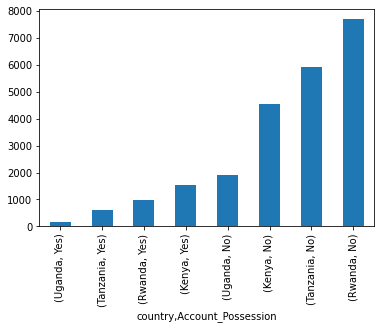

In [141]:
Dataset.groupby(["country", "Account_Possession"])["Account_Possession"].count().sort_values(ascending = True).plot.bar()

The diagram represents both part, ie those with a bank account and those without- country comparison.

Rwanda has the highest number of people who don't possess a bank account.

Kenya has the highest number of people who posses a bank account, even though that number is still fairly low.

# EXPLORATORY ANAYLSIS- MULTIVARIATE

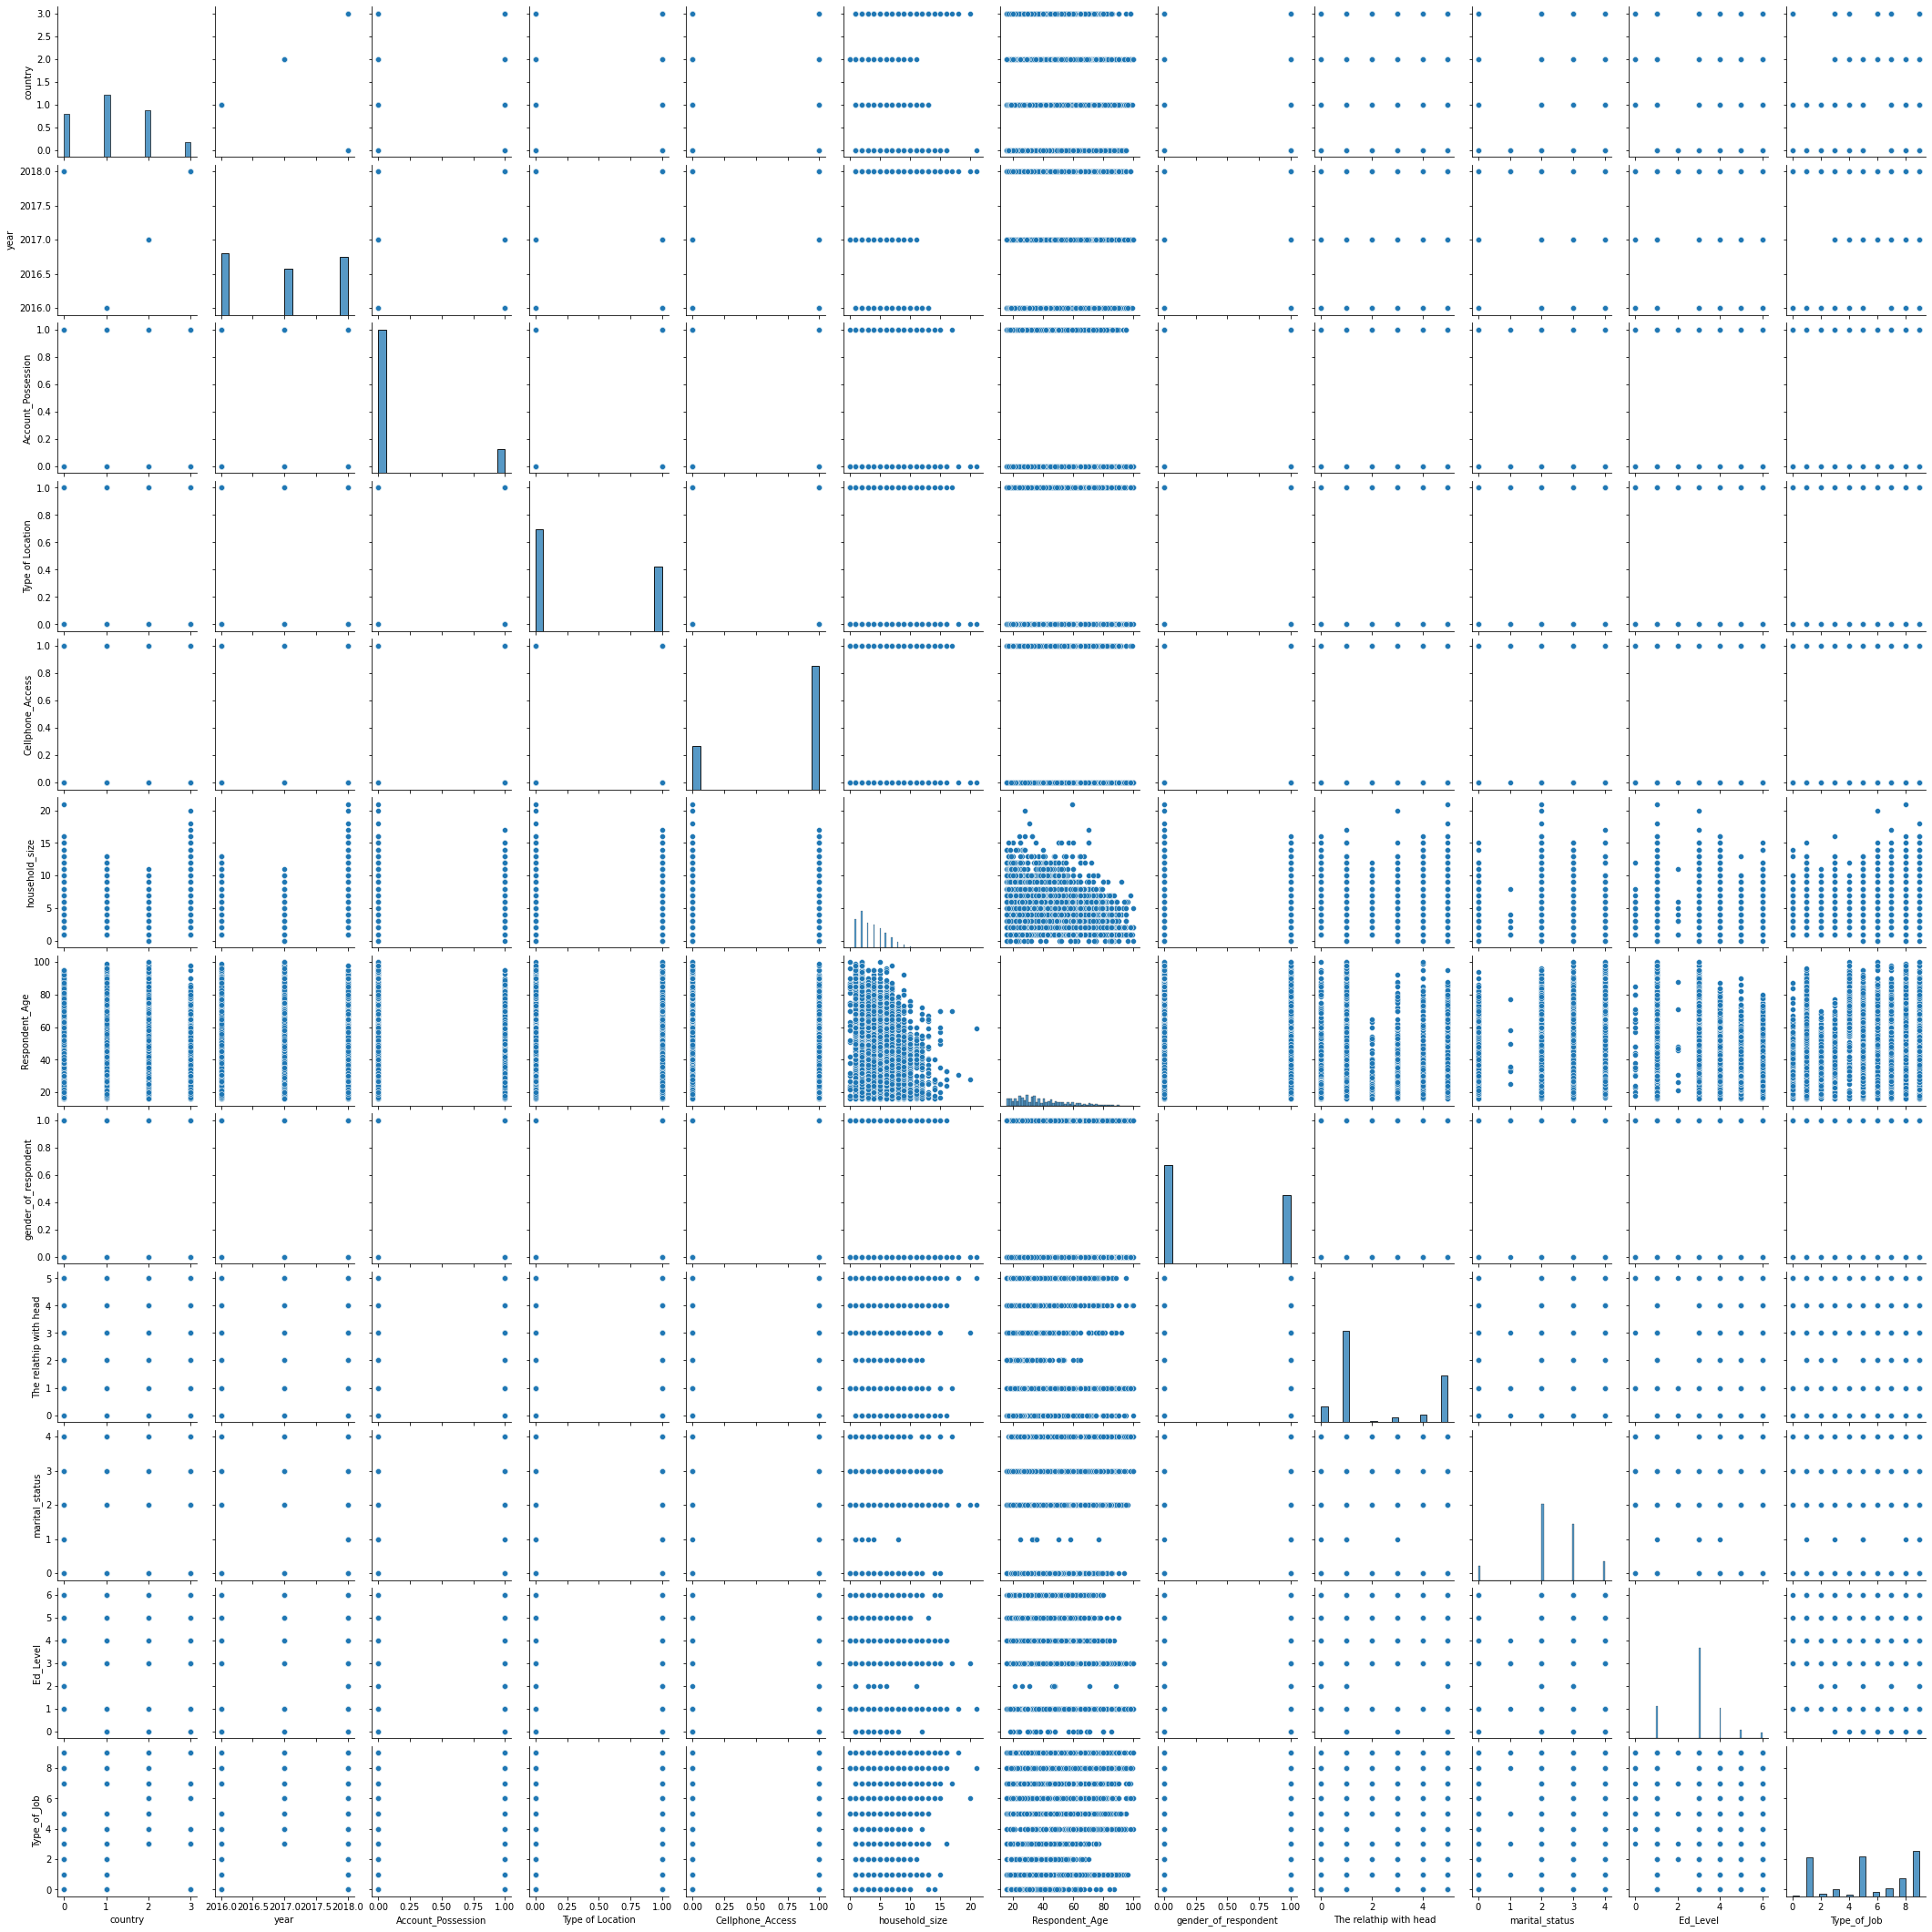

In [188]:
sns.pairplot(Dataset)
plt.show()

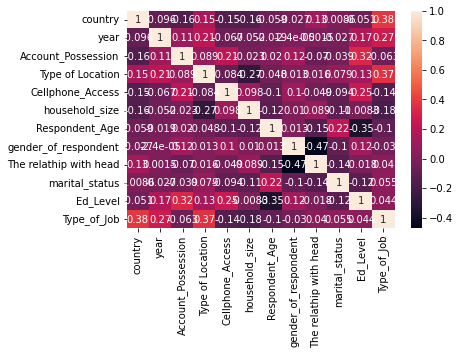

In [187]:
sns.heatmap(Dataset.corr(), annot=True)
plt.show()

In [150]:
Zhi = Dataset.drop('year', axis=1)

#Convert year variable to object
Zhi['year'] = Dataset['year'].astype('object')

# Get categorical codes for categorical columns
categorical_columns = ['country', 'Account_Possession', 'Type of Location', 'Cellphone_Access', 'gender_of_respondent', 'The relathip with head', 'marital_status', 'Ed_Level','Type_of_Job']

for col in categorical_columns:
  Dataset[col] = Zhi[col].astype('category').cat.codes

In [151]:
display(Zhi)

,country,Account_Possession,Type of Location,Cellphone_Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Ed_Level,Type_of_Job,year
0,0,1,0,1,3.0,24.0,0,5,2,4,9,2018
1,0,0,0,0,5.0,70.0,0,1,4,1,4,2018
2,0,1,1,1,5.0,26.0,1,3,3,6,9,2018
3,0,0,0,1,5.0,34.0,0,1,2,3,3,2018
4,0,0,1,0,8.0,26.0,1,0,3,3,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,0,0,1,4.0,48.0,0,1,0,1,7,2018
23520,3,0,0,1,2.0,27.0,0,1,3,4,7,2018
23521,3,0,0,1,5.0,27.0,0,4,4,3,7,2018
23522,3,0,1,1,7.0,30.0,0,4,0,4,9,2018


In [152]:
Zhi.dtypes

country                      int8
Account_Possession           int8
Type of Location             int8
Cellphone_Access             int8
household_size            float64
Respondent_Age            float64
gender_of_respondent         int8
The relathip with head       int8
marital_status               int8
Ed_Level                     int8
Type_of_Job                  int8
year                       object
dtype: object

In [153]:
Apache = Zhi.drop('year', axis=1)


In [154]:
Apache.dtypes

country                      int8
Account_Possession           int8
Type of Location             int8
Cellphone_Access             int8
household_size            float64
Respondent_Age            float64
gender_of_respondent         int8
The relathip with head       int8
marital_status               int8
Ed_Level                     int8
Type_of_Job                  int8
dtype: object

In [155]:
display(Apache)

,country,Account_Possession,Type of Location,Cellphone_Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Ed_Level,Type_of_Job
0,0,1,0,1,3.0,24.0,0,5,2,4,9
1,0,0,0,0,5.0,70.0,0,1,4,1,4
2,0,1,1,1,5.0,26.0,1,3,3,6,9
3,0,0,0,1,5.0,34.0,0,1,2,3,3
4,0,0,1,0,8.0,26.0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...
23519,3,0,0,1,4.0,48.0,0,1,0,1,7
23520,3,0,0,1,2.0,27.0,0,1,3,4,7
23521,3,0,0,1,5.0,27.0,0,4,4,3,7
23522,3,0,1,1,7.0,30.0,0,4,0,4,9


In [156]:
X = Apache.drop('Account_Possession', 1)
Y = Apache['Account_Possession']

In [157]:
Apache.sample(100)

,country,Account_Possession,Type of Location,Cellphone_Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Ed_Level,Type_of_Job
19601,2,0,1,0,2.0,26.0,0,5,3,3,5
19047,2,1,0,1,1.0,63.0,1,1,3,6,4
8339,1,0,0,1,5.0,28.0,0,0,3,4,5
11982,1,1,1,1,6.0,21.0,0,0,3,4,8
1897,0,0,1,0,4.0,18.0,0,3,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...
20898,2,0,1,1,3.0,46.0,0,5,3,3,9
778,0,0,0,0,4.0,64.0,0,5,2,3,1
5774,0,1,1,1,4.0,37.0,1,1,2,4,9
15208,2,0,1,1,1.0,24.0,0,5,3,5,3


In [158]:
Apache.isnull().sum()

country                   0
Account_Possession        0
Type of Location          0
Cellphone_Access          0
household_size            0
Respondent_Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Ed_Level                  0
Type_of_Job               0
dtype: int64

In [159]:
Apache = Apache.fillna(method='ffill')


In [160]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [162]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [164]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18835405, 0.16305721, 0.15373858, 0.10284087, 0.0847087 ,
       0.08055628, 0.07199899, 0.05702033, 0.05406251, 0.04366247])

In [165]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [167]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [169]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

DT = confusion_matrix(Y_test, Y_pred)
print(DT)
print('Accuracy' , accuracy_score(Y_test, Y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


# Linear Discriminant Analysis

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [172]:
#Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [174]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [175]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

AM = confusion_matrix(Y_test, Y_pred)
print(AM)
print('Accuracy' + str(accuracy_score(Y_test, Y_pred)))

[[3929  107]
 [ 449  183]]
Accuracy0.8808911739502999


# FACTOR ANALYSIS

In [176]:
#Adequacy Test
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Apache)
chi_square_value, p_value

(31055.42536200775, 0.0)

In [177]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Apache)

In [181]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(Apache, 11, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.942544
1,1.722673
2,1.585163
3,1.144704
4,0.859462
5,0.804830
6,0.767102
7,0.696401
8,0.548854
9,0.493325


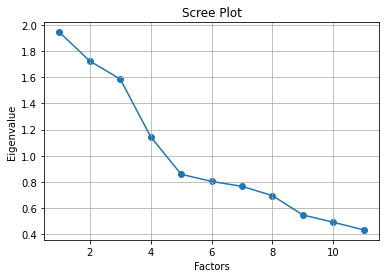

In [183]:
#Creating a scree plot using matplotlib
#
plt.scatter(range(1,Apache.shape[1]+1),ev)
plt.plot(range(1,Apache.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [184]:
#Performing Factor Analysis
fa = FactorAnalyzer()
fa.analyze(Apache, 6, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
country,0.953281,-0.032431,0.057926,0.238553,-0.158041,-0.003699
Account_Possession,-0.091171,0.086804,0.006228,0.062547,0.553086,0.061598
Type of Location,-0.019794,-0.032031,0.035004,0.742862,0.070820,0.016304
Cellphone_Access,-0.054570,-0.072654,0.019159,-0.175003,0.397713,0.072644
household_size,-0.080295,-0.126402,0.121551,-0.376641,0.000553,0.020156
Respondent_Age,-0.040205,0.890534,-0.103844,-0.007283,-0.113268,0.032914
gender_of_respondent,0.002886,-0.003334,-0.068471,-0.007463,0.135218,0.713362
The relathip with head,0.075123,-0.057064,0.807592,0.000491,-0.048090,-0.575980
marital_status,-0.019229,0.208861,-0.271523,0.140373,-0.099418,-0.148175
Ed_Level,0.012641,-0.315226,0.021652,0.112056,0.615062,0.047708


In [185]:
#Performing factor analysis for 5 factors
fa = FactorAnalyzer()
fa.analyze(Apache, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
country,0.042960,-0.021427,0.491357,-0.248869,0.172373
Account_Possession,-0.055338,0.075458,-0.007803,0.582219,-0.025978
Type of Location,0.027851,-0.036297,0.551217,0.165171,-0.194360
Cellphone_Access,-0.072026,-0.057588,-0.183047,0.368909,0.128330
household_size,0.036934,-0.093685,-0.362375,-0.025038,0.221490
Respondent_Age,-0.066244,0.962649,-0.052051,-0.109871,-0.221873
gender_of_respondent,-0.556775,0.037617,0.015743,0.149488,0.186013
The relathip with head,0.945835,-0.016560,0.061120,-0.013700,0.315251
marital_status,-0.010728,0.126381,0.073643,-0.104366,-0.386501
Ed_Level,-0.055413,-0.270520,0.110183,0.585522,0.118136


In [186]:
#Getting variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,1.224475,1.044502,1.179672,0.962897,0.480329
Proportion Var,0.111316,0.094955,0.107243,0.087536,0.043666
Cumulative Var,0.111316,0.206271,0.313513,0.401050,0.444716


Factor analysis explores large datasets and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables.  An example is this case, we get to see that the expectation of individuals most likely having or use a bank account depends on a combination of several factors. This provides a more natural data interpretation. In the same way, the results are still controversial as interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.
Between PCA and LDA, LDA offers a higher level of accuracy but the level of accuracy should still be increased. 


#Conclusions and Recommendations
# Conclusion
Rwanda has the highest number of people who don’t posses a bank account.
Kenya has the highest number of people who posses a bank account, even though the number is still very low.
There is a big disparity between men and women in times of financial inclusion. Women have way fewer banks accounts than men.

# Recommendations
Rwanda should benchmark on what Kenya does to try and improve its financial inclusion.
There is an untapped market in mobile banking considering there is a high number of people who have cell-phone.


# Follow-Up Question?
Did we have the right data? No. The data could have been better. There was missing data and some outliers which leads to making statistical inferences with data that would have otherwise helped reach a more informed solution.